In [2]:
# need to install pandas and matplotlib first

In [3]:
import pandas as pd
import matplotlib.pyplot as plt



In [4]:
df = pd.read_csv("delta.csv")
print(df.head(10))

               Date          Chat Name  Creator        Exchanges      Symbol  \
0  01/03/2021 13:59  #Delta 15 staging      NaN  Binance Futures    AXS/USDT   
1  01/03/2021 13:59  #Delta 15 staging      NaN  Binance Futures   YFII/USDT   
2  01/03/2021 13:59  #Delta 15 staging      NaN  Binance Futures  ALPHA/USDT   
3  01/03/2021 13:59  #Delta 15 staging      NaN  Binance Futures    TRB/USDT   
4  01/03/2021 13:20  #Delta 15 staging      NaN  Binance Futures   AVAX/USDT   
5  01/03/2021 13:16  #Delta 15 staging      NaN  Binance Futures   AAVE/USDT   
6  01/03/2021 13:15  #Delta 15 staging      NaN  Binance Futures   RUNE/USDT   
7  01/03/2021 13:15  #Delta 15 staging      NaN  Binance Futures    UNI/USDT   
8  01/03/2021 13:07  #Delta 15 staging      NaN  Binance Futures   COMP/USDT   
9  01/03/2021 13:03  #Delta 15 staging      NaN  Binance Futures    BLZ/USDT   

      Status         Leverage Direction  Last Target  Signal Gained Profit %  
0  Cancelled  Isolated (5.0X)     Short 

In [5]:
"""Data Cleaning: Remove unnecessary data. However for cancelled, might be of use in the future, but take it out for now"""
refined_df = df[(df["Status"] != "Cancelled")] \
    .drop(columns="Creator")
print(refined_df.head())

                Date          Chat Name        Exchanges     Symbol  \
23  01/03/2021 12:04  #Delta 15 staging  Binance Futures   CRV/USDT   
30  01/03/2021 11:46  #Delta 15 staging  Binance Futures   AXS/USDT   
37  01/03/2021 11:30  #Delta 15 staging  Binance Futures   BEL/USDT   
53  01/03/2021 08:24  #Delta 15 staging  Binance Futures  BAND/USDT   
54  01/03/2021 08:21  #Delta 15 staging  Binance Futures   YFI/USDT   

                      Status         Leverage Direction  Last Target  \
23  Partial Targets Achieved  Isolated (5.0X)      Long            3   
30  Partial Targets Achieved  Isolated (5.0X)      Long            2   
37               Stopped Out  Isolated (5.0X)     Short            0   
53  Partial Targets Achieved  Isolated (5.0X)      Long            3   
54  Partial Targets Achieved  Isolated (5.0X)      Long            3   

    Signal Gained Profit %  
23                 11.9537  
30                  3.5009  
37                -15.5910  
53                 10.00

In [6]:
"""Split Dataframe by coin, research more whether is there a more panda-esque method"""
unique_coin_list = refined_df["Symbol"].unique()
print(unique_coin_list)

list_of_coin_df = []

# appends to list_of_coin_df a subset Dataframe of the main Dataframe where the "Symbol" matches the coin
for coin in unique_coin_list:
    list_of_coin_df.append(refined_df[refined_df["Symbol"] == coin])
print(list_of_coin_df)

SDT   
20478  05/12/2020 11:02  #Delta 15 staging  Binance Futures  CVC/USDT   
20514  05/12/2020 00:50  #Delta 15 staging  Binance Futures  CVC/USDT   

                         Status         Leverage Direction  Last Target  \
134    Partial Targets Achieved  Isolated (5.0X)     Short            2   
246    Partial Targets Achieved  Isolated (5.0X)     Short            3   
267                 Stopped Out  Isolated (5.0X)      Long            0   
298    Partial Targets Achieved  Isolated (5.0X)     Short            3   
329                 Stopped Out  Isolated (5.0X)      Long            0   
...                         ...              ...       ...          ...   
20371      All Targets Achieved     Cross (5.0X)     Short            5   
20383               Stopped Out     Cross (5.0X)      Long            0   
20437  Partial Targets Achieved     Cross (5.0X)      Long            2   
20478      All Targets Achieved     Cross (5.0X)     Short            5   
20514      All Target

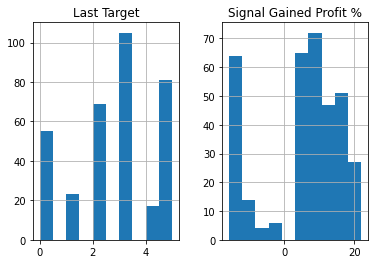

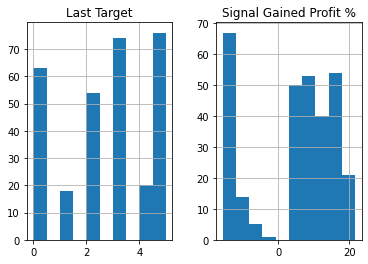

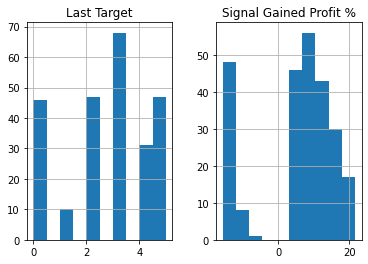

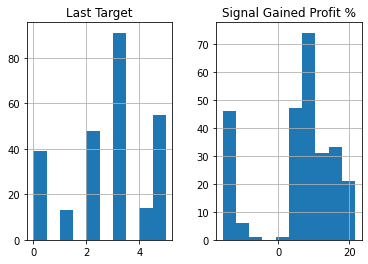

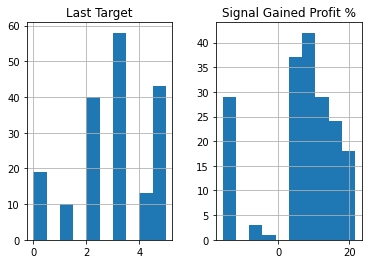

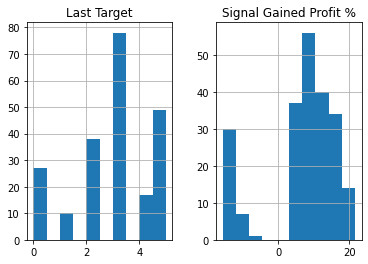

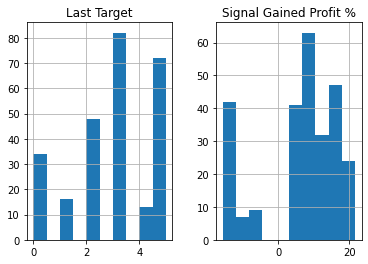

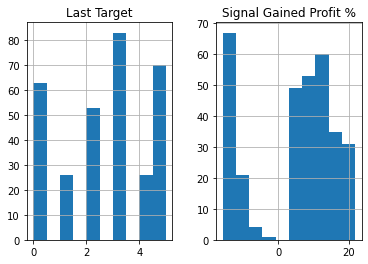

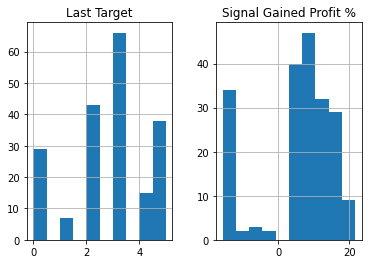

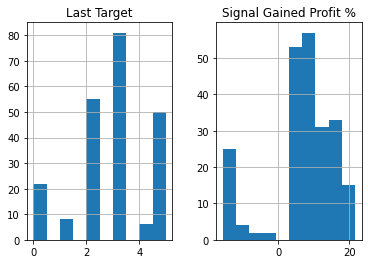

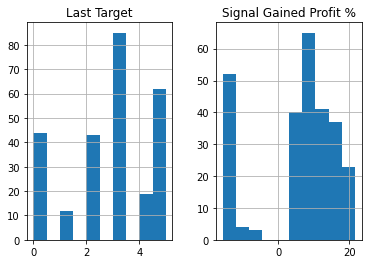

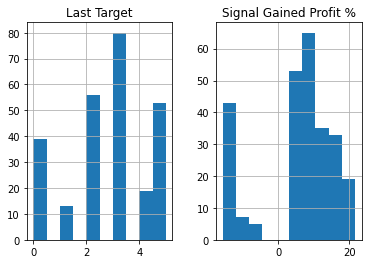

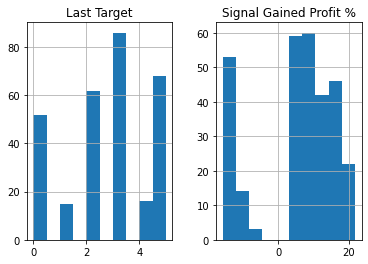

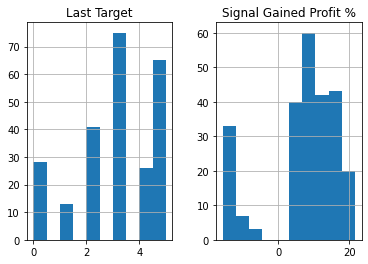

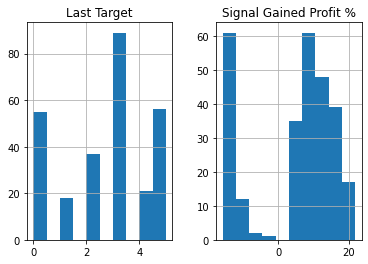

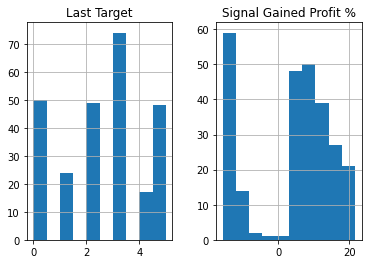

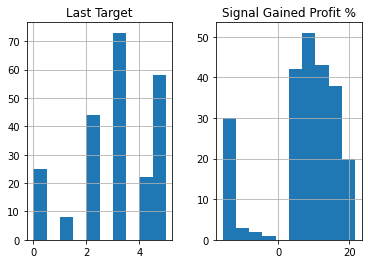

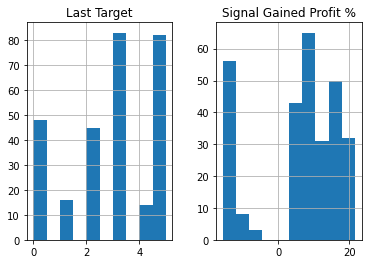

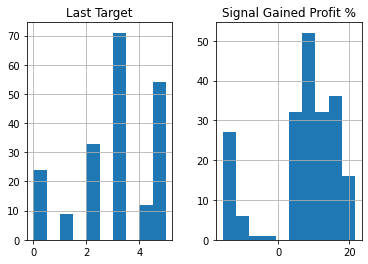

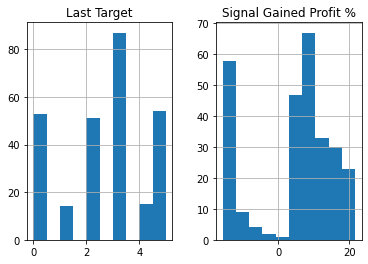

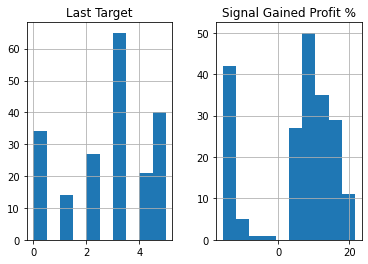

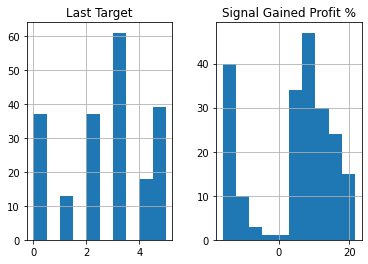

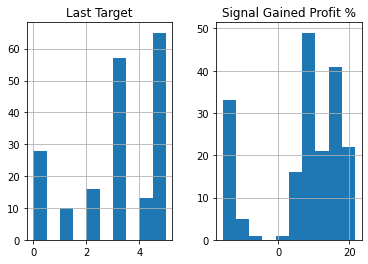

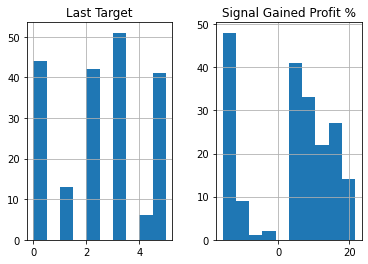

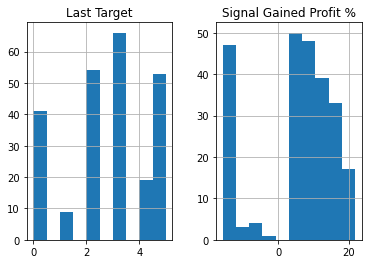

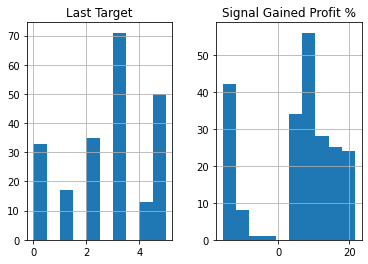

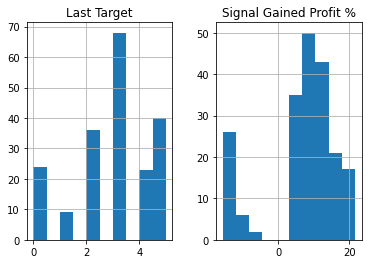

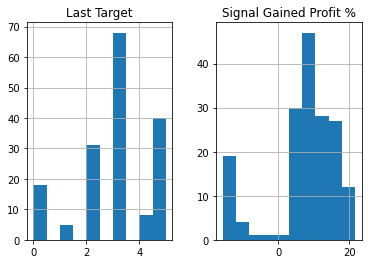

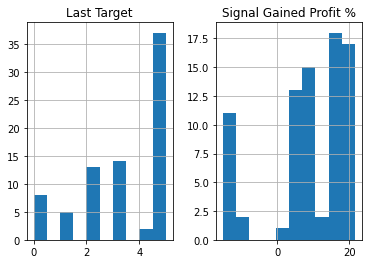

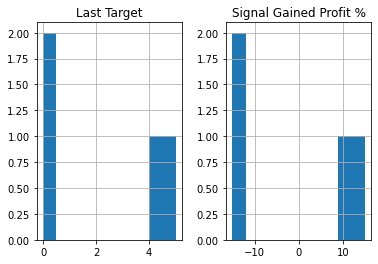

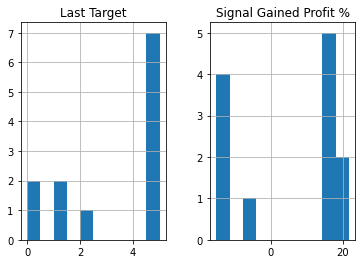

In [19]:
""" Plot out the coins, but having issues with the range of the axes"""
# helper function to loop through the list of coin dataframes and plot each graph as a subplot
%matplotlib inline

def coin_subplot(x="Date", y="Last Target", list_to_loop=list_of_coin_df, kind="bar"):
    for i in range(len(list_of_coin_df)):
        coin_df = list_to_loop[i]
        """ axs[i].bar(x, y, data=coin_df) """
        coin_df.hist()

coin_subplot() 


array([[<AxesSubplot:title={'center':'Last Target'}>,
        <AxesSubplot:title={'center':'Signal Gained Profit %'}>]],
      dtype=object)

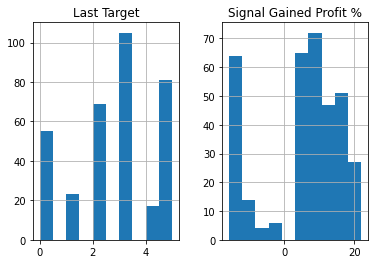

In [14]:
df_test = list_of_coin_df[0]
df_test.hist()
